In [2]:
%pip install scipy

   ---------------------------------------- 0.0/38.5 MB ? eta -:--:--
   - -------------------------------------- 1.8/38.5 MB 9.5 MB/s eta 0:00:04
   ---- ----------------------------------- 4.2/38.5 MB 10.1 MB/s eta 0:00:04
   ------ --------------------------------- 6.0/38.5 MB 9.4 MB/s eta 0:00:04
   -------- ------------------------------- 8.1/38.5 MB 9.6 MB/s eta 0:00:04
   ---------- ----------------------------- 10.2/38.5 MB 9.8 MB/s eta 0:00:03
   ------------ --------------------------- 12.3/38.5 MB 9.7 MB/s eta 0:00:03
   -------------- ------------------------- 14.2/38.5 MB 9.7 MB/s eta 0:00:03
   ---------------- ----------------------- 16.0/38.5 MB 9.6 MB/s eta 0:00:03
   ------------------ --------------------- 17.8/38.5 MB 9.5 MB/s eta 0:00:03
   -------------------- ------------------- 19.4/38.5 MB 9.3 MB/s eta 0:00:03
   ---------------------- ----------------- 21.5/38.5 MB 9.3 MB/s eta 0:00:02
   ----------------------- ---------------- 23.1/38.5 MB 9.2 MB/s eta 0:00:


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


PASO 3: VISUALIZACIONES

[1/4] Cargando datos...
Distritos: 1789

[2/4] Generando grafico de distribucion...
Guardado: 01_temperature_distribution.png


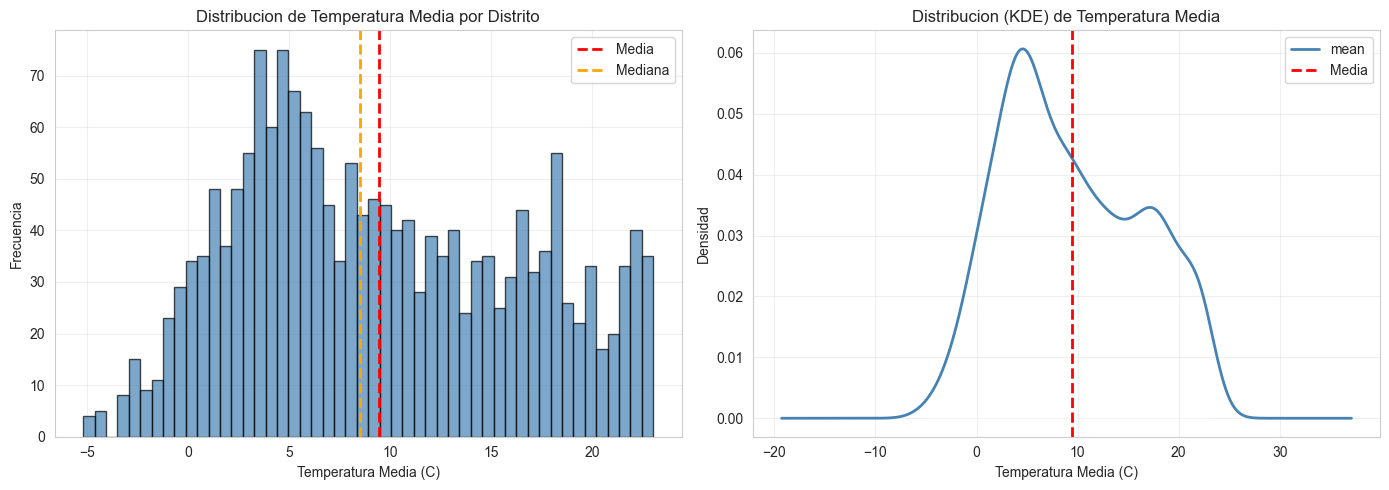


[3/4] Generando grafico de ranking...
Guardado: 02_temperature_ranking.png


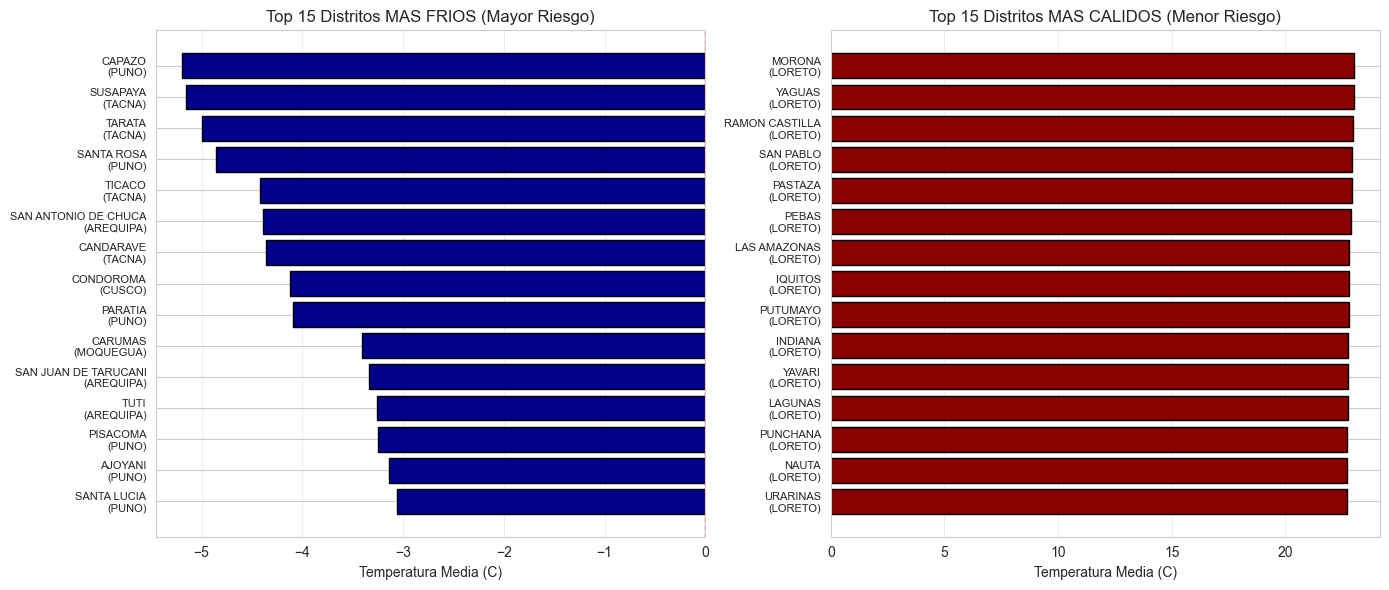


[4/4] Generando mapa coropletico...
Guardado: 03_choropleth_maps.png


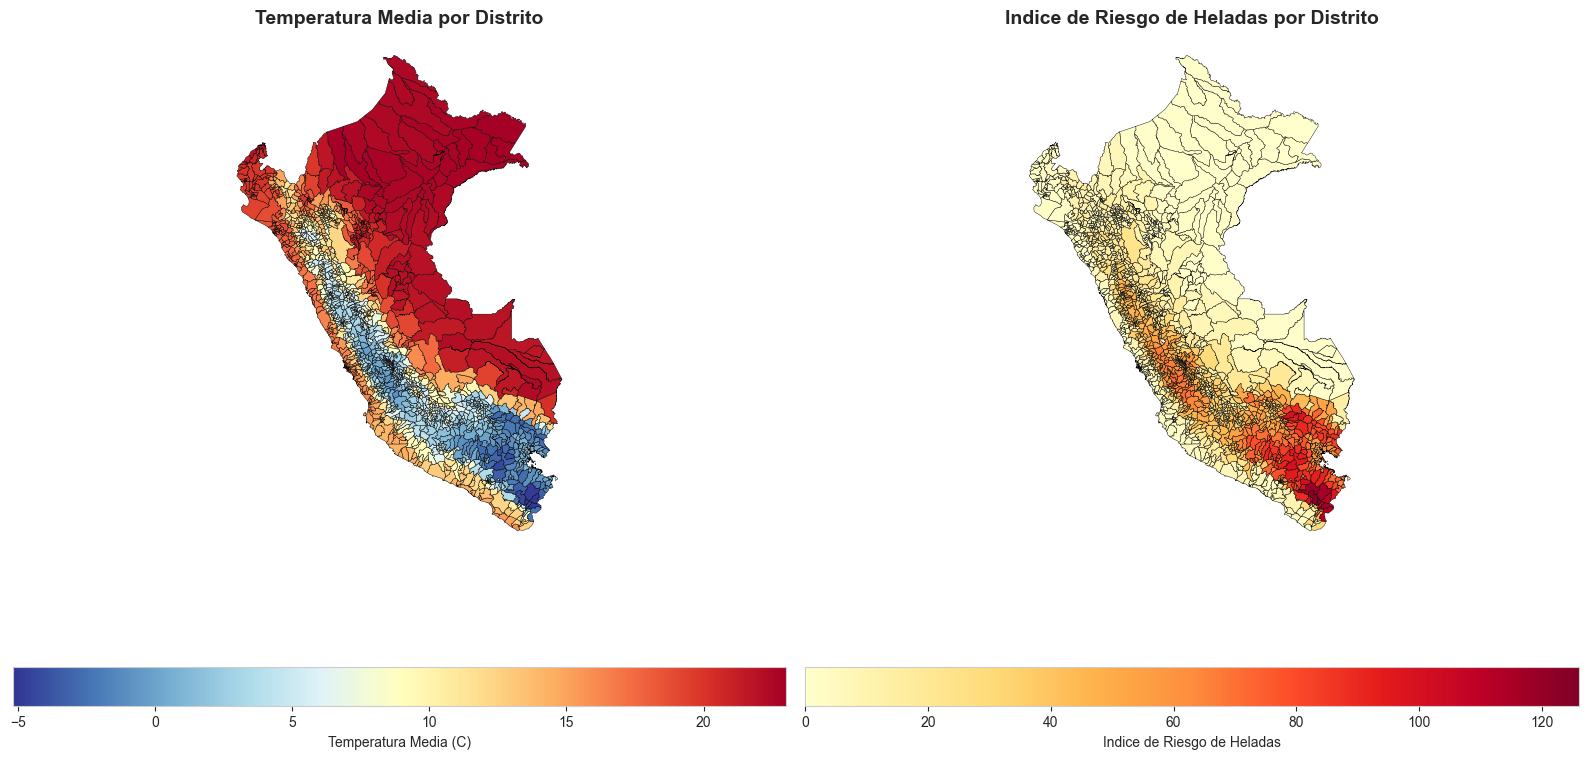


Generando graficos adicionales...
Guardado: 04_temperature_by_region.png


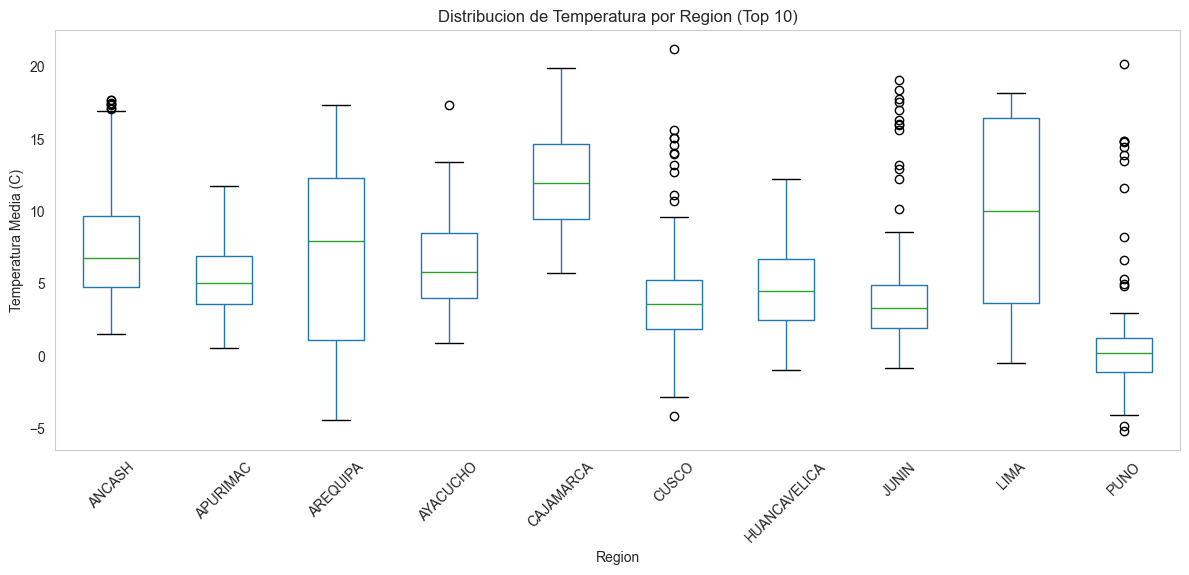


VISUALIZACIONES COMPLETADAS
Total de graficos generados: 4
Ubicacion: C:\Users\ASUS\OneDrive - Universidad del Pacífico\Tareas Data Science\Minimum-Temperature-Raster\data\outputs\plots


In [3]:
"""
Visualizations - Genera graficos requeridos
Ejecuta directamente, guarda PNGs y muestra en pantalla
"""

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from scipy import stats
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

### Configurar estilo
sns.set_style('whitegrid')
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['font.size'] = 10

### Configurar rutas
BASE_DIR = Path("C:/Users/ASUS/OneDrive - Universidad del Pacífico/Tareas Data Science/Minimum-Temperature-Raster")
DATA_DIR = BASE_DIR / 'data'
PROCESSED_DIR = DATA_DIR / 'processed'
TABLES_DIR = DATA_DIR / 'outputs' / 'tables'
PLOTS_DIR = DATA_DIR / 'outputs' / 'plots'
PLOTS_DIR.mkdir(parents=True, exist_ok=True)

print("=" * 70)
print("PASO 3: VISUALIZACIONES")
print("=" * 70)

### CARGAR DATOS
print("\n[1/4] Cargando datos...")

stats_df = pd.read_csv(TABLES_DIR / 'zonal_statistics.csv')
districts = gpd.read_file(PROCESSED_DIR / 'peru_districts.gpkg')

### Merge para mapa
map_data = districts.merge(stats_df[['UBIGEO', 'mean', 'frost_risk_index', 'risk_category']], 
                           on='UBIGEO', how='left')

print(f"Distritos: {len(stats_df)}")

### PLOT 1: DISTRIBUCION
print("\n[2/4] Generando grafico de distribucion...")

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

### Histograma
axes[0].hist(stats_df['mean'], bins=50, color='steelblue', edgecolor='black', alpha=0.7)
axes[0].axvline(stats_df['mean'].mean(), color='red', linestyle='--', linewidth=2, label='Media')
axes[0].axvline(stats_df['mean'].median(), color='orange', linestyle='--', linewidth=2, label='Mediana')
axes[0].set_xlabel('Temperatura Media (C)')
axes[0].set_ylabel('Frecuencia')
axes[0].set_title('Distribucion de Temperatura Media por Distrito')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

### KDE
stats_df['mean'].plot.kde(ax=axes[1], color='steelblue', linewidth=2)
axes[1].fill_between(stats_df['mean'], 0, stats_df['mean'].apply(lambda x: 0), alpha=0.3)
axes[1].axvline(stats_df['mean'].mean(), color='red', linestyle='--', linewidth=2, label='Media')
axes[1].set_xlabel('Temperatura Media (C)')
axes[1].set_ylabel('Densidad')
axes[1].set_title('Distribucion (KDE) de Temperatura Media')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
dist_path = PLOTS_DIR / '01_temperature_distribution.png'
plt.savefig(dist_path, bbox_inches='tight')
print(f"Guardado: {dist_path.name}")
plt.show()

### PLOT 2: RANKING
print("\n[3/4] Generando grafico de ranking...")

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

### Top 15 MAS FRIOS (mayor riesgo)
top15_cold = stats_df.nsmallest(15, 'mean')[['NAME', 'REGION', 'mean']].copy()
top15_cold['label'] = top15_cold['NAME'].str[:20] + '\n(' + top15_cold['REGION'] + ')'

axes[0].barh(range(15), top15_cold['mean'], color='darkblue', edgecolor='black')
axes[0].set_yticks(range(15))
axes[0].set_yticklabels(top15_cold['label'], fontsize=8)
axes[0].set_xlabel('Temperatura Media (C)')
axes[0].set_title('Top 15 Distritos MAS FRIOS (Mayor Riesgo)')
axes[0].axvline(0, color='red', linestyle='--', linewidth=1)
axes[0].grid(True, alpha=0.3, axis='x')
axes[0].invert_yaxis()

### Top 15 MAS CALIDOS (menor riesgo)
top15_warm = stats_df.nlargest(15, 'mean')[['NAME', 'REGION', 'mean']].copy()
top15_warm['label'] = top15_warm['NAME'].str[:20] + '\n(' + top15_warm['REGION'] + ')'

axes[1].barh(range(15), top15_warm['mean'], color='darkred', edgecolor='black')
axes[1].set_yticks(range(15))
axes[1].set_yticklabels(top15_warm['label'], fontsize=8)
axes[1].set_xlabel('Temperatura Media (C)')
axes[1].set_title('Top 15 Distritos MAS CALIDOS (Menor Riesgo)')
axes[1].grid(True, alpha=0.3, axis='x')
axes[1].invert_yaxis()

plt.tight_layout()
rank_path = PLOTS_DIR / '02_temperature_ranking.png'
plt.savefig(rank_path, bbox_inches='tight')
print(f"Guardado: {rank_path.name}")
plt.show()

### PLOT 3: MAPA COROPLETICO
print("\n[4/4] Generando mapa coropletico...")

fig, axes = plt.subplots(1, 2, figsize=(16, 8))

### Mapa 1: Temperatura Media
map_data.plot(column='mean', 
              cmap='RdYlBu_r',
              legend=True,
              legend_kwds={'label': 'Temperatura Media (C)', 'orientation': 'horizontal'},
              edgecolor='black',
              linewidth=0.3,
              missing_kwds={'color': 'lightgrey'},
              ax=axes[0])
axes[0].set_title('Temperatura Media por Distrito', fontsize=14, fontweight='bold')
axes[0].axis('off')

### Mapa 2: Indice de Riesgo
map_data.plot(column='frost_risk_index',
              cmap='YlOrRd',
              legend=True,
              legend_kwds={'label': 'Indice de Riesgo de Heladas', 'orientation': 'horizontal'},
              edgecolor='black',
              linewidth=0.3,
              missing_kwds={'color': 'lightgrey'},
              ax=axes[1])
axes[1].set_title('Indice de Riesgo de Heladas por Distrito', fontsize=14, fontweight='bold')
axes[1].axis('off')

plt.tight_layout()
map_path = PLOTS_DIR / '03_choropleth_maps.png'
plt.savefig(map_path, bbox_inches='tight')
print(f"Guardado: {map_path.name}")
plt.show()

### PLOT ADICIONAL: Box plot por region
print("\nGenerando graficos adicionales...")

fig, ax = plt.subplots(figsize=(12, 6))

### Top 10 regiones con mas distritos
top_regions = stats_df['REGION'].value_counts().head(10).index
subset = stats_df[stats_df['REGION'].isin(top_regions)]

subset.boxplot(column='mean', by='REGION', ax=ax, rot=45, grid=False)
ax.set_xlabel('Region')
ax.set_ylabel('Temperatura Media (C)')
ax.set_title('Distribucion de Temperatura por Region (Top 10)')
plt.suptitle('')
plt.tight_layout()

box_path = PLOTS_DIR / '04_temperature_by_region.png'
plt.savefig(box_path, bbox_inches='tight')
print(f"Guardado: {box_path.name}")
plt.show()

print("\n" + "=" * 70)
print("VISUALIZACIONES COMPLETADAS")
print("=" * 70)
print(f"Total de graficos generados: 4")
print(f"Ubicacion: {PLOTS_DIR}")
print("=" * 70)